In [0]:
!pip install gdown

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

from sklearn import preprocessing
from matplotlib.image import imread
from matplotlib import pyplot as plt
from skimage.io import imread
from skimage import data, io

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.manifold import SpectralEmbedding

**Importing Labels file**

In [0]:
if os.path.isfile('labels.csv'):
  !ls la*
else:
  !gdown https://drive.google.com/uc?id=1vhf-dRZOVRnALirsTdoVMa996VHdHdlc
  !tar -xvf labels.csv
  
df = pd.read_csv('labels.csv')

Downloading...
From: https://drive.google.com/uc?id=1vhf-dRZOVRnALirsTdoVMa996VHdHdlc
To: /content/labels.csv
100% 482k/482k [00:00<00:00, 2.52MB/s]
tar: This does not look like a tar archive
tar: Skipping to next header
tar: Exiting with failure status due to previous errors


In [0]:
print(df.head())

                                 id             breed
0  000bec180eb18c7604dcecc8fe0dba07       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97             dingo
2  001cdf01b096e06d78e9e5112d419397          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62  golden_retriever


Above we have the labels for the breeds but we will simplify by changing the breeds to integers below

In [0]:
#Need to get all unique breeds

breeds = df["breed"].unique()

# This makes the breed a number instead of strings
le = preprocessing.LabelEncoder()
le.fit(df["breed"])
df["breed_name"] = df["breed"]
df["breed"] = le.transform(df["breed"])
print(len(breeds))

120


In [0]:
print(df)

                                     id  breed                   breed_name
0      000bec180eb18c7604dcecc8fe0dba07     19                  boston_bull
1      001513dfcb2ffafc82cccf4d8bbaba97     37                        dingo
2      001cdf01b096e06d78e9e5112d419397     85                     pekinese
3      00214f311d5d2247d5dfe4fe24b2303d     15                     bluetick
4      0021f9ceb3235effd7fcde7f7538ed62     49             golden_retriever
5      002211c81b498ef88e1b40b9abf84e1d     10           bedlington_terrier
6      00290d3e1fdd27226ba27a8ce248ce85     10           bedlington_terrier
7      002a283a315af96eaea0e28e7163b21b     18                       borzoi
8      003df8b8a8b05244b1d920bb6cf451f9      7                      basenji
9      0042188c895a2f14ef64a918ed9c7b64     97           scottish_deerhound
10     004396df1acd0f1247b740ca2b14616e     99            shetland_sheepdog
11     0067dc3eab0b3c3ef0439477624d85d6    113                 walker_hound
12     00693

In [0]:
print(df.head())
labels = []
labels = df["breed"]
print(labels[0:5])

                                 id  breed        breed_name
0  000bec180eb18c7604dcecc8fe0dba07     19       boston_bull
1  001513dfcb2ffafc82cccf4d8bbaba97     37             dingo
2  001cdf01b096e06d78e9e5112d419397     85          pekinese
3  00214f311d5d2247d5dfe4fe24b2303d     15          bluetick
4  0021f9ceb3235effd7fcde7f7538ed62     49  golden_retriever
0    19
1    37
2    85
3    15
4    49
Name: breed, dtype: int64


All breeds are now identified by an integer

# Part 1 - Getting our dataset

In [0]:
from keras.applications import xception
from keras.applications.vgg16 import preprocess_input, decode_predictions
from tqdm import tqdm
from keras.preprocessing import image


from skimage.transform import resize

# Part 1

if os.path.isfile('train.tar.gz'):
  !ls la*
else:
  !gdown https://drive.google.com/uc?id=1kSc5EtnpgZAUJIhV-fEhXwVt-48HjfHj
  !tar -xvf train.tar.gz
  
# get pic count from dataframe
numPics = len(df.index)

INPUT_SIZE = 64
X = np.zeros((numPics,INPUT_SIZE,INPUT_SIZE,3), dtype='float32')
cnt = 0
labels = []
POOLING = 'avg'


# iterate over dataframe
for idx, row in df.iterrows():
  
  img = image.load_img('train/'+row['id']+'.jpg', target_size=(INPUT_SIZE, INPUT_SIZE))
  img = image.img_to_array(img)
  
  X[cnt] = xception.preprocess_input(np.expand_dims(img.copy(), axis=0))
  cnt += 1
  if cnt%500 == 0:
    print(cnt)
  labels.append(row['breed'])

Using TensorFlow backend.


Downloading...
From: https://drive.google.com/uc?id=1kSc5EtnpgZAUJIhV-fEhXwVt-48HjfHj
To: /content/train.tar.gz
359MB [00:06, 53.3MB/s]
./._train
train/
train/._000bec180eb18c7604dcecc8fe0dba07.jpg
train/000bec180eb18c7604dcecc8fe0dba07.jpg
train/._001513dfcb2ffafc82cccf4d8bbaba97.jpg
train/001513dfcb2ffafc82cccf4d8bbaba97.jpg
train/._001cdf01b096e06d78e9e5112d419397.jpg
train/001cdf01b096e06d78e9e5112d419397.jpg
train/._00214f311d5d2247d5dfe4fe24b2303d.jpg
train/00214f311d5d2247d5dfe4fe24b2303d.jpg
train/._0021f9ceb3235effd7fcde7f7538ed62.jpg
train/0021f9ceb3235effd7fcde7f7538ed62.jpg
train/._002211c81b498ef88e1b40b9abf84e1d.jpg
train/002211c81b498ef88e1b40b9abf84e1d.jpg
train/._00290d3e1fdd27226ba27a8ce248ce85.jpg
train/00290d3e1fdd27226ba27a8ce248ce85.jpg
train/._002a283a315af96eaea0e28e7163b21b.jpg
train/002a283a315af96eaea0e28e7163b21b.jpg
train/._003df8b8a8b05244b1d920bb6cf451f9.jpg
train/003df8b8a8b05244b1d920bb6cf451f9.jpg
train/._0042188c895a2f14ef64a918ed9c7b64.jpg
train/0042

Verify data set is ok

(10222, 64, 64, 3)
(64, 64)
[19, 37, 85, 15, 49]


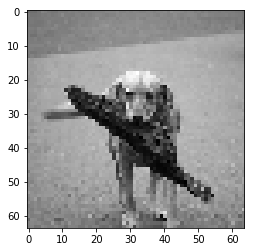

In [0]:
print(X.shape)

x = np.reshape(X[4,:,:,1],(INPUT_SIZE,INPUT_SIZE))
print(x.shape)
plt.imshow(x, cmap='gray')

print(labels[0:5])

Prepare the Data for CNN

- normalize to [0,1]
- convert labels to one hot encoding

In [0]:
print(np.max(X))
print(np.min(X))
x = X

lbls = np.zeros((X.shape[0],120)) # we have 120 dog breeds

for i in range(X.shape[0]):
  lbls[i][labels[i]] = 1
  
# split dataset into training and validation (test set)
from sklearn.model_selection import StratifiedKFold
skf = StratifiedKFold(n_splits=10)
skf.get_n_splits(x, labels)

for train_index, test_index in skf.split(X, labels):
  X_train, X_test =    x[train_index],    x[test_index]
  y_train, y_test = lbls[train_index], lbls[test_index]

print("X_train:")
print(X_train.shape)
print("X_test")
print(X_test.shape)
print("y_train:")
print(y_train.shape)
print("y_test")
print(y_test.shape)
  
print(labels[0])
print(lbls[0])


xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
train_x_bf = xception_bottleneck.predict(X_train, batch_size=32, verbose=1)
test_x_bf = xception_bottleneck.predict(X_test, batch_size=32, verbose=1)
print('Xception train bottleneck features shape: {} size: {:,}'.format(train_x_bf.shape, train_x_bf.size))
print('Xception test bottleneck features shape: {} size: {:,}'.format(test_x_bf.shape, test_x_bf.size))


1.0
-1.0
X_train:
(9254, 64, 64, 3)
X_test
(968, 64, 64, 3)
y_train:
(9254, 120)
y_test
(968, 120)
19
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
Instructions for updating:
Colocations handled automatically by placer.
968/968 [==============================] - 1s 790us/step
Xception train bottleneck features shape: (9254, 2048) size: 18,952,192
Xception test bottleneck features shape: (968, 2048) size: 1,982,464


# Trying Logistic Regression instead
## Xception

Iteration 1, loss = 22.24902846
Iteration 2, loss = 7.20989521
Iteration 3, loss = 5.86645708
Iteration 4, loss = 5.34256216
Iteration 5, loss = 5.01733560
Iteration 6, loss = 4.77904631
Iteration 7, loss = 4.58229799
Iteration 8, loss = 4.43108616
Iteration 9, loss = 4.26852567
Iteration 10, loss = 4.13002766
Iteration 11, loss = 3.97052104
Iteration 12, loss = 3.81382178
Iteration 13, loss = 3.66578473
Iteration 14, loss = 3.51319032
Iteration 15, loss = 3.34384641
Iteration 16, loss = 3.17351693
Iteration 17, loss = 3.01574718
Iteration 18, loss = 2.83489020
Iteration 19, loss = 2.64845986
Iteration 20, loss = 2.47645193
Iteration 21, loss = 2.31889791
Iteration 22, loss = 2.13862891
Iteration 23, loss = 1.98987517
Iteration 24, loss = 1.82529496
Iteration 25, loss = 1.68266428
Iteration 26, loss = 1.52612484
Iteration 27, loss = 1.38554742
Iteration 28, loss = 1.26087482
Iteration 29, loss = 1.14416837
Iteration 30, loss = 1.03241457
Iteration 31, loss = 0.93492952
Iteration 32, lo

<Figure size 432x288 with 0 Axes>

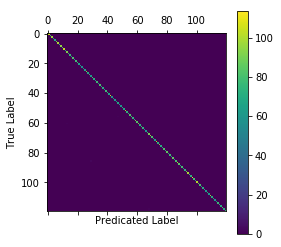

<Figure size 432x288 with 0 Axes>

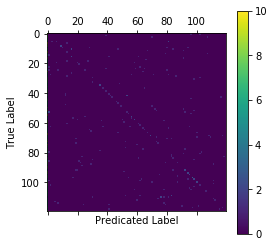

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import log_loss, accuracy_score
from sklearn.metrics import balanced_accuracy_score
from sklearn.neural_network import MLPClassifier

import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

from sklearn.metrics import confusion_matrix

# Use this method if you do not yet know the best set of neurons and value of eta
bestNeurons=0
bestEta=0
bestScore=float('-inf')
score=0
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
# All options for nnls
# nnls = [(1000, ), (500,200), (400,200), (300,200), (500, ), (500,150), (400,150), (300,150)]
nnls = [(400,150)]
for neurons in nnls:
  for eta in [0.1,0.01,0.001,0.0001]:
    kf = KFold(n_splits=3) # Can change the number of splits to make the program faster
    cvscore=[]
    for train_index, test_index in skf.split(X, labels):
      X_train, X_test =    x[train_index],    x[test_index]
      y_train, y_test = lbls[train_index], lbls[test_index]
      # Xception
      train_x_bf = xception_bottleneck.predict(X_train, batch_size=32, verbose=1)
      test_x_bf = xception_bottleneck.predict(X_test, batch_size=32, verbose=1)
      
      # here we create the MLP classifier
      mlp = MLPClassifier(hidden_layer_sizes=neurons, verbose=False, learning_rate_init=eta)
      
      # here we train the MLP
      mlp.fit(train_x_bf, y_train)
      # now we get E_out for validation set
      score=mlp.score(test_x_bf, y_test)
      cvscore.append(score)

    # average CV score
    score=sum(cvscore)/len(cvscore)
    if (score > bestScore):
      bestScore=score
      bestNeurons=neurons
      bestEta=eta
      print("Neurons " + str(neurons) + ", eta " + str(eta) + ". Testing set CV score: %f" % score)

classifier =  MLPClassifier(hidden_layer_sizes=bestNeurons, verbose=True, learning_rate_init=bestEta)

# Use the following line of code when you know the best set of neurons and value of eta
# classifier =  MLPClassifier(hidden_layer_sizes=(400,200), verbose=True, learning_rate_init=0.001)

classifier.fit(train_x_bf, y_train)

test_probs = classifier.predict_proba(test_x_bf)
test_preds = classifier.predict(test_x_bf)
train_preds = classifier.predict(train_x_bf)

train_matrix = confusion_matrix(y_train.argmax(axis=1), train_preds.argmax(axis=1))
test_matrix = confusion_matrix(y_test.argmax(axis=1), test_preds.argmax(axis=1))

# Saving the matrices to a csv file
np.savetxt("train_matrix.csv", train_matrix, delimiter=",")
np.savetxt("test_matrix.csv", test_matrix, delimiter=",")

print(train_matrix)
print(test_matrix)

# Train matrix
fig = plt.figure()
plt.matshow(train_matrix)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.savefig('confusion_matrix_train.jpg')

# Test matrix
fig = plt.figure()
plt.matshow(test_matrix)
plt.colorbar()
plt.ylabel('True Label')
plt.xlabel('Predicated Label')
plt.savefig('confusion_matrix_test.jpg')

print('Validation Xception LogLoss {}'.format(log_loss(y_test, test_probs)))

all_accuracy = []
for i in range(y_test.shape[0]):
  all_accuracy.append(balanced_accuracy_score(y_test[i].astype(int), test_preds[i]))
  
print(np.mean(all_accuracy))
  
print('Validation Xception Accuracy {}'.format(np.mean(all_accuracy)))

### Predicting stuff

(64, 64)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
17
17
['border_terrier']


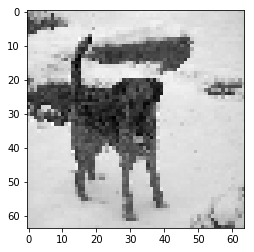

In [0]:
testPic = np.reshape(X_test[1,:,:,1],(INPUT_SIZE,INPUT_SIZE))
print(testPic.shape)
plt.imshow(testPic, cmap='gray')
print(y_test[1])
print(np.argmax(y_test[1]))
print(labels[test_index[1]])
print(le.inverse_transform([labels[test_index[1]]]))

0
[[2.75845216e-16 9.73115241e-18 1.07363709e-20 3.13930566e-17
  1.35600565e-12 5.91310163e-13 4.87830697e-06 3.25765389e-08
  1.18890813e-01 6.02193535e-03 5.64915023e-14 1.64541713e-11
  1.42503907e-12 1.78273262e-03 2.89171482e-12 8.17384266e-14
  7.68774254e-08 9.67872118e-18 2.44766129e-15 1.17543612e-14
  6.48009561e-21 3.45745724e-11 1.92122848e-21 3.85333505e-14
  3.38200069e-02 7.93492740e-12 1.15719357e-11 1.34513766e-05
  2.78780075e-14 1.05138992e-02 2.45431959e-10 2.27065697e-17
  1.59097977e-13 3.32215707e-07 3.90336224e-15 3.26281267e-09
  1.62145900e-09 2.16561754e-12 1.30504752e-16 1.16826660e-07
  1.05802930e-06 3.88385799e-12 2.47271388e-10 7.00353535e-15
  8.14301243e-18 1.32597963e-07 6.40390997e-17 6.09556113e-13
  1.03307435e-20 7.29199335e-08 9.05512094e-18 5.08988978e-17
  2.19823986e-09 7.20336508e-06 2.71675066e-16 1.03409539e-11
  8.78884561e-12 2.40422781e-13 6.11609871e-15 2.19215843e-20
  2.20182366e-11 1.41312328e-11 6.27379348e-20 6.34840625e-14
  1.12

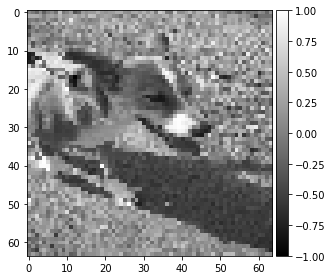

In [0]:
from skimage.io import imread
from skimage import data, io

print(min(labels))
sample = 123
prediction = classifier.predict_proba(np.reshape(test_x_bf[sample], (1, 2048)))

print(prediction)
print(np.argmax(prediction))
print(le.inverse_transform([labels[test_index[sample]]]))
print(y_test[sample].astype(int))
print(np.argmax(y_test[sample]))


x = np.reshape(X_test[sample,:,:,1],(INPUT_SIZE,INPUT_SIZE))
io.imshow(x, cmap='gray')

Testing shapes of images and editing confusion matrix code to make it work

## Outside Data

1/1 [==============================] - 0s 12ms/step
(1, 2048)
0
[[3.63355340e-13 3.54891712e-09 2.73515092e-13 3.98826199e-07
  3.16137292e-06 2.97148219e-11 7.03983136e-12 4.51149248e-10
  1.29943364e-07 1.43669289e-01 1.01460643e-11 4.46024336e-11
  2.48196497e-11 1.59976627e-09 1.89494558e-07 1.64258858e-09
  1.75530513e-11 2.42763428e-04 2.86146008e-09 1.09711694e-09
  4.35538463e-13 1.45654153e-06 2.97356617e-07 2.39962051e-11
  9.79857560e-06 6.68036728e-05 3.76064421e-09 6.72608845e-14
  2.14676328e-06 2.12679755e-07 8.81526785e-05 2.14680959e-10
  1.19334222e-13 5.80424226e-09 2.45879718e-10 4.70436847e-07
  1.82496968e-15 5.75591753e-14 6.24075065e-12 5.85877680e-07
  1.01094257e-08 1.08708879e-08 2.97468275e-07 4.08877307e-07
  2.98839820e-08 2.18946652e-06 6.80969016e-08 1.38482730e-06
  4.82514806e-14 4.25793640e-06 7.72980540e-14 3.17486443e-04
  4.58257080e-11 1.06144123e-10 2.39163166e-13 6.72020631e-09
  1.13089489e-09 6.75323422e-09 1.00699304e-08 6.13432179e-08
  5.31

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


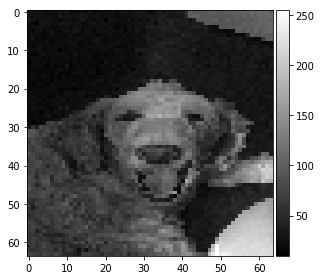

In [0]:
img = image.load_img('max1.jpg', target_size=(INPUT_SIZE, INPUT_SIZE))
oimg = image.img_to_array(img)

img = xception.preprocess_input(np.expand_dims(oimg.copy(), axis=0))

test_pic = xception_bottleneck.predict(img, batch_size=32, verbose=1)

print(test_pic.shape)


print(min(labels))
prediction = classifier.predict_proba(test_pic)

print(prediction)
print(np.argmax(prediction))
print(prediction[0][np.argmax(prediction)])
print(le.inverse_transform([labels[np.argmax(prediction)]]))

print(oimg.shape)
io.imshow(oimg[:,:,2], cmap='gray')

1/1 [==============================] - 0s 12ms/step
(1, 2048)
0
[[3.13327702e-06 1.05974074e-03 5.82042978e-08 1.39098583e-05
  1.84928345e-04 6.47678866e-08 7.52437499e-06 1.03040177e-06
  4.10801799e-04 1.05812145e-05 2.12414613e-01 1.07727981e-06
  1.76279238e-06 1.39314493e-06 5.35254369e-05 1.50015567e-07
  1.78747715e-05 6.62406820e-05 1.32315382e-03 1.45961022e-07
  4.65620298e-07 1.08968038e-05 2.80132818e-07 1.40859326e-03
  2.52781446e-03 1.75641798e-03 8.01932935e-05 1.27628483e-07
  2.36002106e-07 3.95193175e-06 1.16591970e-04 5.11885654e-03
  1.37159202e-05 3.23118723e-06 4.91336150e-07 9.27346802e-05
  9.70526349e-08 1.73636564e-07 2.48747580e-07 3.80971951e-07
  1.40576834e-04 1.08162219e-03 2.57646917e-07 1.14840066e-05
  1.23578149e-09 5.81919313e-05 3.56492796e-07 3.12561862e-03
  2.13543951e-06 2.11855962e-06 2.17742996e-07 1.08745405e-03
  7.18620924e-03 1.60163378e-05 2.51516517e-08 3.48863792e-03
  1.94804155e-07 2.15155286e-05 1.38993975e-09 5.07413856e-04
  1.99

/usr/local/lib/python3.6/dist-packages/skimage/io/_plugins/matplotlib_plugin.py:80: UserWarning: Float image out of standard range; displaying image with stretched contrast.
  warn("Float image out of standard range; displaying "


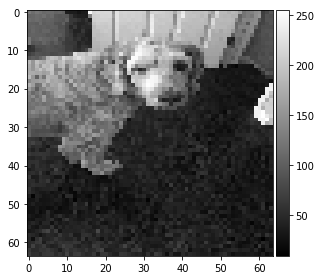

In [0]:
img = image.load_img('max2.jpg', target_size=(INPUT_SIZE, INPUT_SIZE))
oimg = image.img_to_array(img)

img = xception.preprocess_input(np.expand_dims(oimg.copy(), axis=0))

test_pic = xception_bottleneck.predict(img, batch_size=32, verbose=1)

print(test_pic.shape)


print(min(labels))
prediction = classifier.predict_proba(test_pic)

print(prediction)
print(np.argmax(prediction))
print(prediction[0][np.argmax(prediction)])
print(le.inverse_transform([labels[np.argmax(prediction)]]))

print(oimg.shape)
io.imshow(oimg[:,:,2], cmap='gray')

# Original Attempts
## Do not run these blocks of code
### They no longer work or are attempts to fix errors in the above program

In [0]:
print(valid_preds.shape)
print(y_test.shape)

print(valid_preds[0])
print(y_test[0].astype(int))

#print('Validation Xception Accuracy {}'.format(balanced_accuracy_score((y_test * range(120)).sum(axis=1), valid_preds)))

all_accuracy = []
for i in range(y_test.shape[0]):
  all_accuracy.append(balanced_accuracy_score(y_test[i].astype(int),valid_preds[i]))

print(np.mean(all_accuracy))
                      
#balanced_accuracy_score(y_test.astype(int), valid_preds)

#print('Validation Xception Accuracy {}'.format(balanced_accuracy_score(y_test, valid_preds)))

(968, 120)
(968, 120)
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
0.5383012709215917


In [0]:
logreg = LogisticRegression(multi_class='multinomial', solver='lbfgs', random_state=SEED)
logreg.fit(train_i_bf, (ytr * range(NUM_CLASSES)).sum(axis=1))
valid_probs = logreg.predict_proba(valid_i_bf)
valid_preds = logreg.predict(valid_i_bf)

# Utilized the MLP Method from Homework 3 as a guide
I tried to edit this method from our homework to fit the dog data I am using in this program

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import KFold

# # number of samples
# N = 1000

# # generate data & split it into X (training input) and y (target output)
# X, y = hw3_4_a_gendata.genDataSet(N)

# # linear regression solution
# w=np.linalg.pinv(X.T.dot(X)).dot(X.T).dot(y)


#neurons  <- number of neurons in the hidden layer
#eta  <- the learning rate parameter

bestNeurons=0
bestEta=0
bestScore=float('-inf')
score=0
xception_bottleneck = xception.Xception(weights='imagenet', include_top=False, pooling=POOLING)
nnls = [(1000,200), (500,200), (400,200), (300,200), (1000,150), (500,150), (400,150), (300,150)]
for neurons in nnls:
  for eta in range(1,11,1):
    eta=eta/10.0
    kf = KFold(n_splits=10)
    cvscore=[]
#     for train, validation in kf.split(X):
#       X_train, X_validation, y_train, y_validation = X[train, :], X[validation, :], y[train], y[validation]
    for train_index, test_index in skf.split(X, labels):
      X_train, X_test =    x[train_index],    x[test_index]
      y_train, y_test = lbls[train_index], lbls[test_index]
      # Xception
      train_x_bf = xception_bottleneck.predict(X_train, batch_size=32, verbose=1)
      test_x_bf = xception_bottleneck.predict(X_test, batch_size=32, verbose=1)
      
      # here we create the MLP classifier
      mlp = MLPClassifier(hidden_layer_sizes=neurons, verbose=False, learning_rate_init=eta)
      
      # here we train the MLP
      mlp.fit(train_x_bf, y_train)
      # now we get E_out for validation set
      score=mlp.score(test_x_bf, y_test)
      cvscore.append(score)

    # average CV score
    score=sum(cvscore)/len(cvscore)
    if (score > bestScore):
      bestScore=score
      bestNeurons=neurons
      bestEta=eta
      print("Neurons " + str(neurons) + ", eta " + str(eta) + ". Testing set CV score: %f" % score)

# # here we get a new training dataset
# X, y = hw5gendata.genDataSet(N)
# here we create the final MLP classifier
# mlp =  MLPClassifier(hidden_layer_sizes=(bestNeurons), verbose=True, learning_rate_init=bestEta)
# # here we train the final MLP
# mlp.fit(X, y)
# E_out in training
# print("Training set score: %f" % mlp.score(X, y)) 
# # here we get a new testing dataset
# X, y = hw5gendata.genDataSet(N)
# here test the final MLP classifier and get E_out for testing set
# ypred=mlp.predict(test_x_bf)
# score=mlp.score(test_x_bf, y_test)
print("Testing set score: %f" % score)
plt.plot(X[:, 0], X[:, 1], '.')
plt.plot(X[:, 0], y, 'rx')
plt.plot(X[:, 0], ypred, '-k')
ypredLR=X.dot(w)
plt.plot(X[:, 0], ypredLR, '--g')
plt.show()

NameError: ignored

# Convolutional Neural Network
### Part 2 - Building the CNN
### Part 3 - Fitting the CNN to the images
CNNs were my original attempt and did not work very well

In [0]:
# PART 2

# Importing the Keras libraries and packages
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
# from keras.layers import Input
# from keras.layers import Concatenate
from keras.utils import to_categorical
from keras.callbacks import ModelCheckpoint

# Initialising the CNN
classifier = Sequential()

# # Step 1 - Convolution
# classifier.add(Conv2D(32, (5, 5), input_shape = (INPUT_SIZE, INPUT_SIZE, 3), 
#                       activation = 'relu'))

# # Step 2 - Pooling
# classifier.add(MaxPooling2D(pool_size = (4, 4)))

# # Adding a second convolutional layer
# classifier.add(Conv2D(32, (3, 3), activation = 'relu'))
# classifier.add(MaxPooling2D(pool_size = (4, 4)))

# Step 3 - Flattening and Concatenation
# classifier.add(Flatten())

# Step 4 - Full connection
classifier.add(Dense(units = 512, activation = 'relu', input_dim=2048))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 256, activation = 'relu'))
classifier.add(Dropout(0.1))
classifier.add(Dense(units = 120, activation = 'sigmoid'))

# Compiling the CNN
classifier.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', 
                   metrics = ['categorical_accuracy'])

# Define a checkpoint callback                                                     
filepath = 'model-{epoch:02d}-{val_loss:.8f}.h5'        
checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=1,            
                             save_best_only=True, mode='min')        
  


print(classifier.summary())
print(train_x_bf.shape, y_train.shape)
print(test_x_bf.shape, y_test.shape)



# PART 3

classifier.fit(train_x_bf, y_train,
               batch_size = 512,
               epochs = 500,
               callbacks=[checkpoint],
               validation_data = (test_x_bf, y_test))

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_10 (Dense)             (None, 512)               1049088   
_________________________________________________________________
dropout_7 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_11 (Dense)             (None, 256)               131328    
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_12 (Dense)             (None, 120)               30840     
Total params: 1,211,256
Trainable params: 1,211,256
Non-trainable params: 0
_________________________________________________________________
None
(9254, 2048) (9254, 120)
(968, 2048) (968, 120)


ValueError: ignored